#### Nonlinear Regression -- computational techniques/notes

__prep'd by__: Eru Kyeyune-Nyombi, PhD

__Ref__: Nonlinear Regression Analysis and Its Applications, 
1st ed., Douglas M.Bates and Donald G. Watts 

__Date__: 2-July-2019

-------

## <font color ='red'>Motivation/context</font>:

* __context__ -- Nyombi was developing software algorithms for estimating a battery's state-of-charge (SoC) and encountered the following used in python:

        q, r = np.linalg.qr(UY.T)       # QR decomposition
    
        U, S, _ = np.linalg.svd(WOW, full_matrices=False) # singular value decomposition


* __objective__ -- to _really_ understand how/why these computational methods (i.e., SVD and QR decomposition) are used in nonlinear regression so that they can be more easily implemented in another programming-language (C, C++, etc.)

    * <font color ='green'>__Ans_why__</font>: QR and SVD are used for faster computation. I.e., they break-up/decompose a larger matrix into smaller pieces to simplify computation

    * <font color='blue'>__Ans_how__</font>: TBD; answered in this notebook
    
------

In [1]:
import numpy as np
from scipy.linalg import solve # x = solve(A,b) when Ax = b and A,x,b are matrices
import matplotlib.pyplot as plt
import math

from IPython.display import display, Math # for print math equations

### <font color='blue'> --------------------------------- Example PCB 1, start
    
### _pseudocode_

$\ln([\text{PCB}]) = \beta_1 + \beta_2 \text{age}$

$y = [1 \hspace{1em} x][\beta_1 \hspace{1em} \beta_2]^T$

where, $y = \ln([\text{PCB}])$ and $x$ = age

\begin{equation*}
\begin{bmatrix}
y_1 \\ y_2 \\ ... \\ y_N
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 \\ 1 & x_2 \\ ... \\ 1 & x_N
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_2
\end{bmatrix}
\end{equation*}


    beta = solve(Y, X)


In [2]:
file1 = open("PCB_data.txt","r")
tmp = file1.readlines()
file1.close()

In [3]:
age = [] # initialize list
PCB = [] # initialize
for ii in range(1,len(tmp)):
    a = tmp[ii].split()
    age.append(float(a[0]))
    PCB.append(float(a[1]))


Text(0, 0.5, 'PCB, ppm')

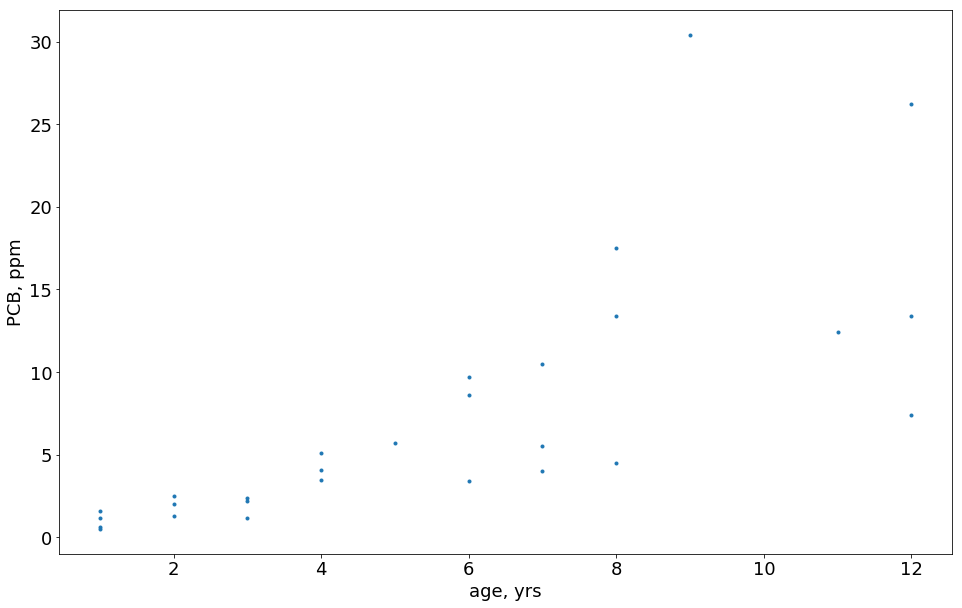

In [4]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 18

plt.plot(age, PCB, '.')
plt.xlabel('age, yrs')
plt.ylabel('PCB, ppm')
# plt.plot(age**(1/3.0),PCB, '.')

### <font color='blue'> --------------------------------- Example PCB 1, end

## compute $\hat{\beta}$ using definition of orthogonality

\begin{eqnarray*}
\pmb{X}^T (\pmb{y} - \pmb{X\hat{\beta}}) &=& 0 \\
\pmb{X}^T \pmb{y} - \pmb{X}^T \pmb{X\hat{\beta}} &=& 0 \\
\pmb{X}^T \pmb{y} &=& \pmb{X}^T \pmb{X\hat{\beta}} \\
\pmb{X}^T \pmb{y} &=& \left(\pmb{X}^T\pmb{X}\right)^{-1} \pmb{\hat{\beta}} \\
\left(\pmb{X}^T\pmb{X}\right)^{-1} \pmb{X}^T \pmb{y} &=& \pmb{\hat{\beta}}
\end{eqnarray*}


To solve, decompose $\pmb{X}$ into a product of an orthogonal matrix and an easily intervted matrix. Two decompostion methods:

1) QR decomposition
* Uses:
    * Gram-Schmidt Orthogonalization or
    * Householder Transformation/tridiagonalization

2) singular value decomposition (SVD)

-------
-----

### Explanation of QR decomposition

\begin{equation*}
\pmb{X} = \pmb{QR}
\end{equation*}

with 

1) Gram-Schmidt Orthogonalization or

2) Householder Transformation

-------

### <font color = 'blue'> Gram-Schmidt Orthogonalization </font>

Given a set of vectors $\pmb{A}$

\begin{equation*}
\pmb{A} = [a_1, a_2]
\end{equation*}

\begin{equation*}
\pmb{A} = 
\begin{bmatrix}
2 & 2 \\ 1 & 2
\end{bmatrix}
\end{equation*}

where $a_1 = [2,1]^T$ and $a_2 = [2,2]^T$

Gram-Schmidt finds the orthonormal basis for $\pmb{A}$

\begin{equation*}
\pmb{u_1} = \pmb{a_1}
\end{equation*}

\begin{equation*}
\pmb{u_2} = \pmb{a_1} - \text{proj}_{\pmb{u_1}} \pmb{a_2}
\end{equation*}

Now because $u_1$ and $u_2$ are orthogonal, you have the following:

\begin{equation*}
\pmb{u_1} \cdot \pmb{u_2}^T = 0
\end{equation*}

https://en.wikipedia.org/wiki/Gram–Schmidt_process


-----------------------x 

good ref. on Householder Transformation, which is used for QR decomposition in 
"Nonlinear Regresssion and Its Apps." by Bates and Watts

http://mathfaculty.fullerton.edu/mathews/n2003/HouseholderMod.html


## Next:

1) finish example of Householder transformation

see http://mathfaculty.fullerton.edu/mathews/n2003/HouseholderMod.html

2) complete example of QR decomposition via Householder Transformation

see Appendix 2 pg. 286 in "Nonlinear Regresssion and Its Apps." by Bates and Watts

3) Study singular value decomposition (SVD)

---------

## <font color ='blue'> Householder Transformation/Tridiagonalization </font>

ref: http://mathfaculty.fullerton.edu/mathews/n2003/HouseholderMod.html

Theorem: If $\pmb{P}$ is a Householder matrix, the transformation $\pmb{PAP}$ is accomplished as follows....

Let $\pmb{V = Aw}$

compute $\pmb{c = W^T V}$ and $\pmb{Q = V - cW}$

then, 

\begin{equation*}
\boxed{
\pmb{PAP} = \pmb{A} - 2\pmb{W}^T\pmb{Q} - 2\pmb{Q}\pmb{W}^T
}
\end{equation*}

example: Use Householder's method to reduce the symmetric matrix $\pmb{A_0}$ into a symmetric tridiagonal matrix 

\begin{equation*}
\pmb{A_0} = 
\begin{bmatrix}
4 & 2 & 2 & 1 \\
2 & -3 & 1 & 1 \\
2 & 1 & 3 & 1 \\
1 & 1 & 1 & 2 
\end{bmatrix}
\end{equation*}


\begin{equation*}
\pmb{X} =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
=
\begin{bmatrix}
4 \\
2 \\
2 \\
1 
\end{bmatrix}
\end{equation*}

\begin{eqnarray*}
S &=& \text{magnitude of all elements in $\pmb{X}$ except $x_1$} \\
&=& \sqrt{x_2^2 + x_3^2 + x_4^2} \\
&=& \sqrt{2^2 + 2^2 + 1^2} \\
&=& \sqrt{9} \\
&=& 3
\end{eqnarray*}

\begin{eqnarray*}
R &=& \sqrt{2 S (S + x_2)} \\
&=& \sqrt{2(3)(3 + 2)} \\
&=& \sqrt{30}
\end{eqnarray*}

\begin{eqnarray*}
\pmb{W} &=& \frac{1}{R}
\begin{bmatrix}
0 & S + x_2 & x_3 & x_4
\end{bmatrix}
\\
&=& \frac{1}{\sqrt{30}}
\begin{bmatrix}
0 & 5 & 2 & 1
\end{bmatrix}
\end{eqnarray*}


\begin{equation*}
\pmb{V} = \pmb{A_0} \pmb{W}
\end{equation*}

---------

## <font color = 'violet'> QR decomposition via Householder reflections </font>

- works by finding the appropriate Householder reflection matrices (i.e., $\pmb{H_1}$, $\pmb{H_2}$, etc.) and mulitplying them by the original matrix selected for decomposition (i.e., $\pmb{A}$) to get the upper triangular matrix $\pmb{R}$ 

Note: $\pmb{Q} = \pmb{H_1 H_2}...\pmb{H_N}$

- more common approach to QR decomposition than Gram-Schmidt orthogonalization because Gram-Schmidt orthogonalization can lead to inaccuracies in $\pmb{Q}$

- Householder reflections are another method of orthogonalization that <font color = 'blue'> transforms a vector $\pmb{x}$ into a unit vector $\pmb{y}$ which is parallel to $\pmb{x}$ </font>

\begin{equation*}
H = I - 2\nu \nu^T
\end{equation*}

 where,

$\pmb{H}$ = Householder reflection matrix 

$\pmb{I}$ = identity matrix 

$\nu$ = normal vector w.r.t. $\pmb{H}$

## Examaple: 
find the QR decomposition of matrix $\pmb{A}$ via Householder reflections

\begin{equation*}
A = 
\begin{bmatrix}
2 & -2 & 18 \\
2 & 1 & 0 \\
1 & 2 & 0
\end{bmatrix}
\end{equation*}

### Solution:

Find the reflection $\pmb{\nu_1}$ of first column in $\pmb{A}$.

\begin{equation*}
\pmb{\nu_1} = \pmb{a_1} + \text{sgn}(a_{11}) \|\pmb{a_1}\| \pmb{e_1}
\end{equation*}

where,

$\rightarrow \pmb{a_1}$ is the first column of $\pmb{A}$

$\rightarrow e_1 = [1, 0, 0]$ = 1st orthonormal basis vector in space $\mathbb{R}^3$

\begin{eqnarray*}
\pmb{\nu_1} &=& \pmb{a_1} + \text{sgn}(a_{11}) \|\pmb{a_1}\| \pmb{e_1} \\
&=&
\begin{bmatrix}
2 \\ 2 \\ 1
\end{bmatrix}
+ (+1) \sqrt{2^2 + 2^2 + 1^2}
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
\\
&=&
\begin{bmatrix}
2 \\ 2 \\ 1
\end{bmatrix}
+ 3
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
\\
\nu_1 &=&
\begin{bmatrix}
5 \\ 2 \\ 1
\end{bmatrix}
\end{eqnarray*}

Now solve for the Householder matrix...

\begin{eqnarray*}
H &=& I - 2\nu \nu^T \\
&=& 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}
- 2
\begin{bmatrix}
5 \\ 2 \\ 1
\end{bmatrix}
\begin{bmatrix}
5 & 2 & 1
\end{bmatrix}
\end{eqnarray*}

## Example PCB 14: 
QR decompositon of matrix $\pmb{X}$ using Householder Reflections

<font color = 'blue'> ref: pg286-88, Bates and Watts "Nonlinear Regression and Its Apps" </font>


\begin{equation*}
\pmb{X} =
\begin{bmatrix}
1 & 1.26 \\
1 & 1.82 \\
1 & 2.22
\end{bmatrix}
\end{equation*}


## solution: 

\begin{equation*}
\boxed{
\pmb{H} = \pmb{I} - 2\pmb{uu^T}
}
\end{equation*}

where,

\begin{equation*}
\pmb{u} = \frac{\pmb{y} + \| \pmb{y} \| \pmb{e_1}}{\| \left( \pmb{y} + \| \pmb{y} \| \pmb{e_1} \right) \|}
\end{equation*}

or

\begin{equation*}
\pmb{u} = \frac{\pmb{y} - \| \pmb{y} \| \pmb{e_1}}{\| \left( \pmb{y} - \| \pmb{y} \| \pmb{e_1} \right) \|}
\end{equation*}

$\pmb{e_1} = [1,0,0, ....,0]^T$


1st column in $\pmb{X}$ is $\pmb{x_1} = [1,1,1]^T \equiv \pmb{y}$ 

$\| \pmb{y} \| = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}$

So,

\begin{equation*}
u = \frac{[1,1,1]^T - \sqrt{3} [1,0,0]^T}{\| \left( [1,1,1]^T - \sqrt{3} [1,0,0]^T \right) \|}
\end{equation*}

    y = np.ones([1,3])
    e = np.array([1,0,0])*math.sqrt(3)
    u = (y-b)/np.linalg.norm(y-b)
    print(u)

    [[-0.45970084  0.62796303  0.62796303]]

------------------------x
\begin{equation*}
\pmb{H} = \pmb{I} - 2\pmb{uu^T}
\end{equation*}
    
    H = np.identity(3) - 2*u * u.T
    print(H)
    
    [[ 0.57735027  0.57735027  0.57735027]
     [ 0.57735027  0.21132487 -0.78867513]
     [ 0.57735027 -0.78867513  0.21132487]]

------------------------x

\begin{equation*}
\pmb{X_1} = \pmb{HX}
\end{equation*}

    X = np.mat([[1,1.26],[1,1.82],[1,2.22]])
    print(X)
    
    [[1.   1.26]
     [1.   1.82]
     [1.   2.22]]
     
    X1 = np.matrix.round(H*X,2)
    print(X1)
    
    [[ 1.7321  3.06  ]
     [-0.     -0.6388]
     [-0.     -0.2388]]

===================================================x

Now perform a 2nd rotation/orthogonalization 
by choosing $\pmb{u_2}$ so that Householder refelection $\pmb{H_2}$ 
has zeros in all elements
below the diagonal element of the 2nd column in $\pmb{X_1}$

\begin{equation*}
\pmb{y_2} \equiv \text{elements below diagonal element in 2nd column of } \pmb{X_1} 
= 
\begin{bmatrix}
0 \\ -0.6388 \\ -0.2388
\end{bmatrix}
\end{equation*}

$\| \pmb{y_2} \| = \sqrt{0^2 + -0.6388^2 + 0.2388^2} \approx 0.6820$

Recall for the 1st Householder reflection, you calculate $\pmb{u}$ (aka $\pmb{u_1}$)...

\begin{equation*}
\pmb{u} = \frac{\pmb{y} - \| \pmb{y} \| \pmb{e_1}}{\| \left( \pmb{y} - \| \pmb{y} \| \pmb{e_1} \right) \|}
\end{equation*}

$\pmb{e_1} = [1,0,0, ....,0]^T$

...Now similarly, for the 2nd Householder reflection, calculate $\pmb{u_2}$:
\begin{equation*}
\pmb{u_2} = \frac{\pmb{y_2} - \| \pmb{y_2} \| \pmb{e_2}}{\| \left( \pmb{y_2} - \| \pmb{y_2} \| \pmb{e_2} \right) \|}
\end{equation*}

$\pmb{e_2} = [0,1,0, ....,0]^T$


\begin{equation*}
\pmb{u_2} = \frac{[0, -0.6388, -0.2388]^T - 0.6820 [0,1,0]^T}{\| \left( [0, -0.6388, -0.2388]^T - 0.6820 [0,1,0]^T \right) \|}
\end{equation*}

    y2 = np.copy(np.reshape(X1[:,1],[3,1]))
    y2[0] = 0
    e2 = np.mat([[0],[1],[0]])*np.linalg.norm(y2)
    u2 = (y2-e2)/np.linalg.norm(y2-e2)
    print(u2)
    
    [[ 0.        ]
     [-0.98404528]
     [-0.17791818]]

------------------------x

\begin{equation*}
\pmb{H_2} = \pmb{I} - 2\pmb{u_2 u_2^T}
\end{equation*}
    
    H2 = np.identity(3) - (2*(u2*u2.T))
    print(H2)
    
    [[ 1.          0.          0.        ]
     [ 0.         -0.93669024 -0.35015909]
     [ 0.         -0.35015909  0.93669024]]

------------------------x

\begin{equation*}
\pmb{X_2} = \pmb{H_2 X_1}
\end{equation*}

recall, $\pmb{X_1} = \pmb{H X}$

Therefore, 

\begin{equation*}
\pmb{X_2} = \pmb{H_2 H X} \equiv \pmb{R}
\end{equation*}

where $\pmb{R}$ is the upper triangular matrix in $\pmb{QR}$ decomposition

    X2 = np.matrix.round(H2 * X1,4)
    print(X2)

    [[ 1.7321  3.06  ]
     [ 0.      0.682 ]
     [ 0.     -0.    ]]
  

-----------------------------------------------x------------------------------------------------

### <font color = 'red'> Remember: </font>
QR decomposition is used to decompose matrix $\pmb{X}$ when solving for least squares estimates...

\begin{equation*}
\left(\pmb{X}^T\pmb{X}\right)^{-1} \pmb{X}^T \pmb{y} = \pmb{\hat{\beta}}
\end{equation*}

where, $\pmb{X} = \pmb{QR}$

so, 

\begin{equation*}
\pmb{R} = \pmb{Q}^T \pmb{X}
\end{equation*}

recall from Example PCB 14 in Bates and Watts, $\pmb{X_2} = \pmb{H_2 H X} \equiv \pmb{R}$

\begin{equation*}
\pmb{R} = \pmb{H_2 H X}
\end{equation*}

Now together...

\begin{eqnarray*}
\pmb{R} &=& \pmb{H_2 H X} \\
\pmb{R} &=& \pmb{Q}^T \pmb{X}
\end{eqnarray*}

so, 

\begin{eqnarray*}
\pmb{Q}^T &=& \pmb{H_P ... H} \\
\pmb{Q} &=& \pmb{H_P^T ... H^T}
\end{eqnarray*}

where $P$ = # of columns in $\pmb{X}$

#### <font color = 'blue'> Now remember, Householder transformations $\pmb{H}$ are by definition always symmetric! </font>

so, 
\begin{equation*}
\pmb{H_P}^T = \pmb{H_P}
\end{equation*}

Hence,

\begin{eqnarray*}
\pmb{Q}^T &=& \pmb{H_P ... H} \\
&=& \pmb{H_P^T ... H^T}
\end{eqnarray*}

\begin{equation*}
\boxed{
\pmb{Q} = \pmb{H_P^T ... H^T} = \pmb{H ... H_P}
}
\end{equation*}

E.g., in Example PCB 14 $\pmb{X}$ has 2 columns therefore, $\pmb{Q} = \pmb{H_2^T H^T} = \pmb{HH_2}$

-----------------------------------------------x------------------------------------------------

### <font color='orange'> --------------------------------- Example PCB 14, start

## Example PCB 14


Example PCB1 ended with the following relationship:

\begin{equation*}
\boxed{
\ln(\left[\text{PCB}\right]) = \beta_0 + \beta_1 \text{age}^{1/3}
}
\end{equation*}

where, $y = \ln([\text{PCB}])$ and $x = \text{age}^{1/3}$


In example PCB 3 of Bates and Watts, you selected the following 3 datapts:

(age$^{1/3}$, $\ln([PCB])$)

(1.26, 0.92)

(1.82, 2.15)

(2.22, 2.52)


which are:

(age, ppm of PCB) = 

(2,2.5) 

(6,8.6)

(11,12.4)


\begin{equation*}
\begin{bmatrix}
\ln[\text{PCB}_1] \\
\ln[\text{PCB}_2] \\
\ln[\text{PCB}_3] 
\end{bmatrix}
=
\begin{bmatrix}
1 & \text{age}_1^{1/3}\\
1 & \text{age}_2^{1/3}\\
1 & \text{age}_3^{1/3}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
\end{equation*}

where, 

$\pmb{y} = \left[\ln[\text{PCB}_1], \ln[\text{PCB}_2], \ln[\text{PCB}_3] \right]^T = [0.92, 2.15, 2.52]^T$

$\pmb{\beta} = \left[\beta_0, \beta_1 \right]^T$

and 

\begin{equation*}
\pmb{X} =
\begin{bmatrix}
1 & 1.26 \\
1 & 1.82 \\
1 & 2.22
\end{bmatrix}
\end{equation*}

Perform <font color ='red'> QR decomposition via Householder tridigonalization </font>
on $\pmb{X}$ to solve for least squares estimates $\pmb{\beta}$



In [5]:
X = np.mat([[1,1.26],[1,1.82],[1,2.22]])

### 1st Householder reflection, $\pmb{H_1}$ ...

\begin{equation*}
\pmb{H_1} = \pmb{I} - 2\pmb{u_1 u_1^T}
\end{equation*}

where, 

\begin{equation*}
\pmb{u_1} = \frac{\pmb{x_1} - \| \pmb{x_1} \| \pmb{e_1}}{\| \left( \pmb{x_1} - \| \pmb{x_1} \| \pmb{e_1} \right) \|}
\end{equation*}

$\pmb{x_1} = [1,1,1]^T \equiv$ 1st column in matrix $\pmb{X}$

$\| \pmb{x_1} \| = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}$

$\pmb{e_1} = [1,0,0, ....,0]^T$ (basis vector for 1st dimension in Euclidean space)

In [6]:
x1 = X[:,0] # first column in matrix X
e1 = np.array([1,0,0]).reshape(3,1)*math.sqrt(3)
u1 = (x1-e1)/np.linalg.norm(x1-e1)

H1 = np.identity(3) - 2*u1 * u1.T
print(H1)

[[ 0.57735027  0.57735027  0.57735027]
 [ 0.57735027  0.21132487 -0.78867513]
 [ 0.57735027 -0.78867513  0.21132487]]


### Use $\pmb{H_1}$ to perform a rotation/orthogonalization on $\pmb{X}$...

\begin{equation*}
\pmb{X_1} = \pmb{H_1} \pmb{X}
\end{equation*}


In [7]:
print(type(H1))
print(type(X))

<class 'numpy.matrix'>
<class 'numpy.matrix'>


In [8]:
X1 = np.asmatrix(np.matrix.round(H1*X,4))
print(X1)

[[ 1.7321  3.06  ]
 [-0.     -0.6388]
 [-0.     -0.2388]]


### Peform a 2nd rotation using the 2nd Householder reflection, $\pmb{H_2}$ ...

\begin{equation*}
\pmb{H_2} = \pmb{I} - 2\pmb{u_2 u_2^T}
\end{equation*}

where, 

\begin{equation*}
\pmb{u_2} = \frac{\pmb{x_2} - \| \pmb{x_2} \| \pmb{e_2}}{\| \left( \pmb{x_2} - \| \pmb{x_2} \| \pmb{e_1} \right) \|}
\end{equation*}

$\pmb{x_2} = [0,-0.6388,-0.2388]^T \equiv$ 2nd column in matrix $\pmb{X_1}$ but first element is replaced with 0

$\pmb{e_2} = [0,1,0, ....,0]^T$ (basis vector for 2nd dimension in Euclidean space)

In [9]:
x2 = np.copy(X1[:,1]).reshape(3,1)
x2[0] = 0
e2 = np.array([0,1,0]).reshape(3,1)*np.linalg.norm(x2)
u2 = (x2-e2)/np.linalg.norm(x2-e2)

H2 = np.identity(3) - (2*(u2*u2.T))
print(H2)

[[ 1.          0.          0.        ]
 [ 0.         -0.93669024 -0.35015909]
 [ 0.         -0.35015909  0.93669024]]


### ... the 2nd rotation $\pmb{X_2}$ is the matrix $\pmb{R}$

\begin{eqnarray*}
\pmb{X_2} &=& \pmb{H_2 X_1} \\
\pmb{R} \equiv \pmb{X_2} &=& \pmb{H_2} \pmb{H_1} \pmb{X}
\end{eqnarray*}

(in other words, matrix $\pmb{R} \equiv$ product of all Householder reflections and $\pmb{X}$)

In [10]:
R = np.matrix.round(H2 * X1,4)
print(R)

[[ 1.7321  3.06  ]
 [ 0.      0.682 ]
 [ 0.     -0.    ]]


### ...matrix $\pmb{Q}$ is product of all Householder reflections...

\begin{eqnarray*}
\pmb{Q^T} &=& \pmb{H_2 H_1}\\
&-or-& \\
\pmb{Q} &=& \pmb{H_1 H_2}
\end{eqnarray*}

In [11]:
Q = np.matrix.round(H1 * H2,4) # same as Q = np.matrix.round(H2.T * H.T,4)
print(Q)

[[ 0.5774 -0.743   0.3386]
 [ 0.5774  0.0782 -0.8127]
 [ 0.5774  0.6647  0.4741]]


### <font color ='red'> Check: </font>

\begin{equation*}
\pmb{X} = \pmb{QR}
\end{equation*}

In [12]:
tmp = np.matrix.round(np.asmatrix(Q)*R,2)
print(tmp-X)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


### <font color='orange'> --------------------------------- Example PCB 14, end

### <font color='magenta'> --------------------------------- Example PCB 4, start

## Example PCB 4, 
pg. 14 Bates and Watts 

You have decomposed $\pmb{X}$ into matrices $\pmb{Q}$ and $\pmb{R}$... 

\begin{equation*}
\pmb{X} = 
\begin{bmatrix}
1 & 1.26 \\
1 & 1.82 \\
1 & 2.22
\end{bmatrix}
\end{equation*}

\begin{equation*}
\pmb{X} = \pmb{QR} =  
\begin{bmatrix}
0.5774 & -0.743 & 0.3386 \\
0.5774 & 0.0782 & -0.8127 \\
0.5774 & 0.6647 & 0.4741
\end{bmatrix}
\begin{bmatrix}
1.7321 & 3.06 \\
0 & 0.682 \\
0 & 0
\end{bmatrix}
\end{equation*}

...now solve for least squares estimates $\pmb{\hat{\beta}}$

### <font color = 'blue'> solution: </font>

solve for the projection of $\pmb{w}$ onto the expectation plane/surface $\pmb{Q}$

\begin{equation*}
\pmb{X}\pmb{\hat{\beta}} = \pmb{Q}\pmb{w} 
\end{equation*}

where, $\pmb{w} = \pmb{Q}^T\pmb{y}$


\begin{eqnarray*}
\pmb{w} &=& \pmb{Q}^T\pmb{y} \\
&=& 
\begin{bmatrix}
0.5774 & 0.5774 & 0.5774 \\
-0.743 & 0.0782 & 0.6647 \\
0.3386 &-0.8127 & 0.4741
\end{bmatrix}
\begin{bmatrix}
0.92 \\
2.15 \\
2.52
\end{bmatrix}
\\
&=&
\begin{bmatrix}
3.23 \\ 
1.16 \\
-0.24
\end{bmatrix}
\end{eqnarray*}

In [13]:
y = np.mat([math.log(2.5),
            math.log(8.6),
            math.log(12.4)]).reshape([3,1])
w = np.matrix.round(Q.T * y,4)
print(w)

[[ 3.2252]
 [ 1.161 ]
 [-0.2448]]


### <font color='magenta'> --------------------------------- Example PCB 4, end

### <font color='green'> --------------------------------- Example PCB 5, start
    
## Example PCB 5

Examples PCB 4 and PCB 14 use ONLY 3 datapts. 

Now <font color ='red'> REPEAT </font> using ALL datapts 
to solve for least squares estimates $\pmb{\hat{\beta}}$ using
QR decomposition and the Householder Reflection method

\begin{equation*}
\pmb{X} =
\begin{bmatrix}
1 & \text{age}_1^{1/3} \\
1 & \text{age}_2^{1/3} \\
... & ...\\
1 & \text{age}_N^{1/3} \\
\end{bmatrix}
\end{equation*}

In [14]:
X = np.ones([len(age),2])
y = np.zeros([len(age),1])

for ii in range(0,len(age)):
    X[ii][1] = math.pow(age[ii],1/3.0)
    y[ii] = math.log(PCB[ii])

# print(np.round(X,2))

print('age^{1/3} \t ln([PCB])')
for ii in range(0,len(age)):
    print(np.round(X[ii][1],2),'\t\t', np.round(y[ii],2))

age^{1/3} 	 ln([PCB])
1.0 		 [-0.51]
1.0 		 [0.47]
1.0 		 [-0.69]
1.0 		 [0.18]
1.26 		 [0.69]
1.26 		 [0.26]
1.26 		 [0.92]
1.44 		 [0.79]
1.44 		 [0.88]
1.44 		 [0.18]
1.59 		 [1.25]
1.59 		 [1.41]
1.59 		 [1.63]
1.71 		 [1.74]
1.82 		 [1.22]
1.82 		 [2.27]
1.82 		 [2.15]
1.91 		 [1.39]
1.91 		 [1.7]
1.91 		 [2.35]
2.0 		 [2.86]
2.0 		 [2.6]
2.0 		 [1.5]
2.08 		 [3.41]
2.22 		 [2.52]
2.29 		 [2.6]
2.29 		 [3.27]
2.29 		 [2.]


### 1st Householder reflection, $\pmb{H_1}$ ...

\begin{equation*}
\pmb{H_1} = \pmb{I} - 2\pmb{u_1 u_1^T}
\end{equation*}

where, 

\begin{equation*}
\pmb{u_1} = \frac{\pmb{x_1} - \| \pmb{x_1} \| \pmb{e_1}}{\| \left( \pmb{x_1} - \| \pmb{x_1} \| \pmb{e_1} \right) \|}
\end{equation*}

$\pmb{x_1} = [1,1,...,1]^T \equiv$ 1st column in matrix $\pmb{X}$

$\pmb{e_1} = [1,0,0, ....,0]^T$ (basis vector for 1st dimension in Euclidean space)

\begin{eqnarray*}
\pmb{H_1} &=& \pmb{I} - 2\pmb{u_1 u_1^T} \\
&[=]& [N \times N] - 2 [N \times 1] [1 \times N] \\
\pmb{H_1} &[=]& [N \times N]
\end{eqnarray*}

In [15]:
x1 = np.asmatrix(X[:,0]).reshape(len(age),1) # first column in matrix X
e1 = np.zeros([len(x1),1])
e1[0] = 1
e1 = e1 * np.linalg.norm(x1)
u1 = (x1-e1)/np.linalg.norm(x1-e1)

H1 = np.identity(len(age)) - 2*u1 * u1.T

print('H [=]', H1.shape)

H [=] (28, 28)


In [16]:
X1 = np.asmatrix(np.matrix.round(H1*X,4))
print(X1)

[[ 5.2915  8.8711]
 [ 0.     -0.8341]
 [ 0.     -0.8341]
 [-0.     -0.8341]
 [-0.     -0.5742]
 [-0.     -0.5742]
 [-0.     -0.5742]
 [-0.     -0.3919]
 [-0.     -0.3919]
 [-0.     -0.3919]
 [ 0.     -0.2467]
 [-0.     -0.2467]
 [ 0.     -0.2467]
 [-0.     -0.1241]
 [ 0.     -0.017 ]
 [-0.     -0.017 ]
 [-0.     -0.017 ]
 [ 0.      0.0788]
 [ 0.      0.0788]
 [ 0.      0.0788]
 [ 0.      0.1659]
 [ 0.      0.1659]
 [ 0.      0.1659]
 [-0.      0.246 ]
 [-0.      0.3899]
 [-0.      0.4553]
 [-0.      0.4553]
 [-0.      0.4553]]


### Peform a 2nd rotation using the 2nd Householder reflection, $\pmb{H_2}$ ...

\begin{equation*}
\pmb{H_2} = \pmb{I} - 2\pmb{u_2 u_2^T}
\end{equation*}

where, 

\begin{equation*}
\pmb{u_2} = \frac{\pmb{x_2} - \| \pmb{x_2} \| \pmb{e_2}}{\| \left( \pmb{x_2} - \| \pmb{x_2} \| \pmb{e_1} \right) \|}
\end{equation*}

$\pmb{x_2} = [0,-0.8341,...,0.4553]^T \equiv$ 2nd column in matrix $\pmb{X_1}$ but first element is replaced with 0

$\pmb{e_2} = [0,1,0, ....,0]^T$ (basis vector for 2nd dimension in Euclidean space)

In [17]:
x2 = np.copy(X1[:,1]).reshape(len(age),1)
x2[0] = 0

e2 = np.zeros([len(x1),1])
e2[1] = 1
e2 = e2 * np.linalg.norm(x2)

u2 = (x2-e2)/np.linalg.norm(x2-e2)

H2 = np.identity(len(age)) - (2*(u2*u2.T))
print(H2.shape)

(28, 28)


### ... the 2nd rotation $\pmb{X_2}$ is the matrix $\pmb{R}$

\begin{eqnarray*}
\pmb{X_2} &=& \pmb{H_2 X_1} \\
\pmb{R} \equiv \pmb{X_2} &=& \pmb{H_2} \pmb{H_1} \pmb{X}
\end{eqnarray*}

(in other words, matrix $\pmb{R} \equiv$ product of all Householder reflections and $\pmb{X}$)

In [20]:
R = np.matrix.round(H2 * X1,4)

### ...matrix $\pmb{Q}$ is product of all Householder reflections...

\begin{eqnarray*}
\pmb{Q^T} &=& \pmb{H_2 H_1}\\
&-or-& \\
\pmb{Q} &=& \pmb{H_1 H_2}
\end{eqnarray*}

In [21]:
Q = np.matrix.round(H1 * H2,4) # same as Q = np.matrix.round(H2.T * H.T,4)
print(Q.shape)

(28, 28)


### <font color ='red'> Check: </font>

\begin{equation*}
\pmb{X} = \pmb{QR}
\end{equation*}

In [22]:
tmp = np.matrix.round(np.asmatrix(Q)*R,2)
print(tmp-X)

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.89501051e-05]
 [ 0.00000000e+00  7.89501051e-05]
 [ 0.00000000e+00  7.89501051e-05]
 [ 0.00000000e+00 -2.24957031e-03]
 [ 0.00000000e+00 -2.24957031e-03]
 [ 0.00000000e+00 -2.24957031e-03]
 [ 0.00000000e+00  2.59894803e-03]
 [ 0.00000000e+00  2.59894803e-03]
 [ 0.00000000e+00  2.59894803e-03]
 [ 0.00000000e+00  2.40533233e-05]
 [ 0.00000000e+00  2.87940717e-03]
 [ 0.00000000e+00  2.87940717e-03]
 [ 0.00000000e+00  2.87940717e-03]
 [ 0.00000000e+00 -2.93118277e-03]
 [ 0.00000000e+00 -2.93118277e-03]
 [ 0.00000000e+00 -2.93118277e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.38230519e-05]
 [ 0.00000000e+00 -3.98009057e-03]
 [ 0.00000000e+00  5.71514893e-04]
 [ 0.00000000e+00  5.71514893e-04]
 [ 0.00000000e+00  5.71514893e-04]]


## ....solve for $\pmb{w_1}$ and $\pmb{\hat{\beta}}$

\begin{equation*}
\pmb{w_1} = \pmb{Q_1^T} \pmb{y}
\end{equation*}



In [24]:
beta = [-2.391,2.300]

N = len(R)
P = len(beta)

# R1 = np.triu(R) # 
R1 = np.copy(R[0:P,0:P]) # [P x P] upper triangular matrix of matrix R. (Ref: pg13 of Bates and Wates "Nonlinear Regression and Its Apps")
Q1 = np.copy(Q[:,0:P]) # Q1 is the first P columns of matrix Q. (Ref: pg13 of Bates and Wates "Nonlinear Regression and Its Apps") 

# y = lnPCB
print(R1.shape)
print(Q1.shape)
print(y.shape)
# print(lnPCB.shape)

# print(np.round(lnPCB,2))
# w1 = np.asmatrix(Q1.T * y)

# Q2 = np.copy(Q[:,2]).reshape(3,1)
# w2 = np.asmatrix(Q2.T * y)

# print('w1=', w1)

# print('w2=', w2)

(2, 2)
(28, 2)
(28, 1)


In [25]:
w1 = np.asmatrix(Q1.T) * y
print(w1.shape)
print(w1)

(2, 1)
[[7.75771409]
 [4.97250081]]


### ...solve for $\beta$

\begin{equation*}
\pmb{R_1}\pmb{\hat{\beta}} = \pmb{w_1}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
r_{11} & r_{12} \\
r_{21} & r_{22} 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta_1} \\
\hat{\beta_2} 
\end{bmatrix}
=
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}
\end{equation*}

Use back-substiution.  There are various methods 
(e.g., LU decomposition, Guass-elimination, etc.). 
You chose to use Cramer's Rule

\begin{equation*}
\hat{\beta_1} =
\frac{
\begin{vmatrix}
w_1 & r_{12} \\
w_2 & r_{22} 
\end{vmatrix}
}{
\begin{vmatrix}
r_{11} & r_{12} \\
r_{21} & r_{22} 
\end{vmatrix}
}
\end{equation*}

and 

\begin{equation*}
\hat{\beta_2} =
\frac{
\begin{vmatrix}
r_{11} & w_1 \\
r_{21} & w_2 
\end{vmatrix}
}{
\begin{vmatrix}
r_{11} & r_{12} \\
r_{21} & r_{22} 
\end{vmatrix}
}
\end{equation*}

In [26]:
beta = np.zeros([2,1])

tmp1 = np.copy(R1)
tmp1[0][0] = w1[0]
tmp1[1][0] = w1[1]

beta[0] = np.linalg.det(tmp1)/np.linalg.det(R1)

# ---------------
tmp2 = np.copy(R1)
tmp2[0][1] = w1[0]
tmp2[1][1] = w1[1]

beta[1] = np.linalg.det(tmp2)/np.linalg.det(R1)

print(np.round(beta,3))

[[-2.391]
 [ 2.301]]


# ------------- Explanation 

\begin{equation*}
\pmb{\hat{y}} = \pmb{X} \pmb{\hat{\beta}}
\end{equation*}

where, $\pmb{\hat{y}} \equiv$ best-fit esimates for actual response $\pmb{y}$

<font color = 'red'> NOTE: Bates and Wates use $\hat{\eta}$ instead of $\pmb{\hat{y}}$ </font>

\begin{eqnarray*}
\text{residual error} &=& \pmb{y} - \pmb{\hat{y}} 
\end{eqnarray*}

Now, recall QR decomposition breaks-up/decomposes $\pmb{X}$. I.e., $\pmb{X} = \pmb{Q}\pmb{R}$

So $\pmb{\hat{y}} = \pmb{X} \pmb{\hat{\beta}}$ becomes,

\begin{equation*}
\boxed{
\pmb{\hat{y}} = \pmb{Q}\pmb{R} \pmb{\hat{\beta}}
}
\end{equation*}

### ---------------------------------------------
### Now on a separate note.... 

Recall, $\pmb{X} = \pmb{Q}\pmb{R}$

where the columns of $\pmb{Q}$ define an orthonormal basis for the response space 

Perfom the following transformation on responses $\pmb{y}$ using $\pmb{Q}$ to get projection $\pmb{w}$:

\begin{equation*}
\pmb{w} = \pmb{Q}^T \pmb{y}
\end{equation*}

---------------------

### <font color = 'red'> Sidenote/Clarification: </font> 

$\pmb{w}$ is geometrically defined as the projection of response $\pmb{y}$ onto vector space $\pmb{Q}$.  

For refresher on projections, search online for discussion on projections of vectors in 2- or 3-dimensions (you can actually draw/graph these) or see your own handwritten notes

---------------------

### Dimensional analysis...

Recall,

\begin{equation*}
\begin{bmatrix}
\ln[\text{PCB}_1] \\
\ln[\text{PCB}_2] \\
\ln[\text{PCB}_3]  \\
...\\
\ln[\text{PCB}_{N}]
\end{bmatrix}
=
\begin{bmatrix}
1 & \text{age}_1^{1/3}\\
1 & \text{age}_2^{1/3}\\
1 & \text{age}_3^{1/3} \\
... \\
1 & \text{age}_N^{1/3}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_P
\end{bmatrix}
\end{equation*}

\begin{equation*}
\pmb{y} = \pmb{X}\pmb{\beta}
\end{equation*}

$N = $ # of datapts

$P = $ # of unknown paramters $\pmb{\beta}$

Dimensions:

\begin{eqnarray*}
\pmb{X} &=& \pmb{Q} \pmb{R} \\
[N \times P] &=& [N \times N] [N \times P]
\end{eqnarray*}


### split $\pmb{Q}$...

\begin{equation*}
\pmb{Q} = 
\begin{bmatrix}
\pmb{Q_1} & \pmb{Q_2}
\end{bmatrix}
\end{equation*}

where, 

$\pmb{Q_1} =$ first $P$ columns in $\pmb{Q}$  

and 

$\pmb{Q_2} =$ remaining $N-P$ columns in $\pmb{Q}$

### also split $\pmb{R}$ 

\begin{equation*}
\pmb{R} = 
\begin{bmatrix}
\pmb{R_1} \\ 
0
\end{bmatrix}
\end{equation*}

where $\pmb{R_1}= [P \times P]$ upper triangular matrix in $\pmb{R}$


### So, 

$\pmb{X} = \pmb{Q} \pmb{R} = \pmb{Q_1} \pmb{R_1}$

<font color = 'orange'> Check: </font>

\begin{eqnarray*}
\pmb{X} &=& \pmb{Q_1} \pmb{R_1} \\
&=& [N \times P] [P \times P] \\
&=& [N \times P]
\end{eqnarray*}

<font color = 'orange'> checks out! </font>

### Since you split $\pmb{Q}$ and $\pmb{R}$ you can also split $\pmb{w}$ ...


\begin{equation*}
\pmb{w} = 
\begin{bmatrix}
\pmb{w_1} & \pmb{w_2}
\end{bmatrix}
\end{equation*}


## <font color ='magenta'> Remember: </font> 

$\pmb{w}$ and it's columns/compnents $\pmb{w_1}$ and $\pmb{w_2}$ 
are projections of the measured/actual responses $\pmb{y}$ 
onto the expectation plane/surface/vector-space $\pmb{Q}$ is:


\begin{equation*}
\begin{bmatrix}
\pmb{w_1} \\ 0
\end{bmatrix}
\end{equation*}

...This is the response in Q-coordinates/space.  

The projection of $\pmb{w}$ onto the original/same space as $\pmb{y}$ and in the original coordinates is:

\begin{equation*}
\pmb{\hat{y}} = \pmb{Q} 
\begin{bmatrix}
\pmb{w_1} \\ 0
\end{bmatrix}
= \pmb{Q_1} \pmb{w_1}
\end{equation*}

\begin{equation*}
\boxed{
\pmb{\hat{y}} = \pmb{Q_1} \pmb{w_1}
}
\end{equation*}

# ---------------------------------------------

# Now put it all together...

\begin{equation*}
\pmb{\hat{y}} = \pmb{Q_1} \pmb{w_1}
\end{equation*}

But also, the general def:

\begin{equation*}
\pmb{\hat{y}} = \pmb{X} \pmb{\hat{\beta}}
\end{equation*}


where, $\pmb{X} = \pmb{Q} \pmb{R} = \pmb{Q_1} \pmb{R_1}$

so,

\begin{equation*}
\pmb{\hat{y}} = \pmb{Q_1} \pmb{R_1} \pmb{\hat{\beta}}
\end{equation*}

Hence...

\begin{equation*}
\pmb{\hat{y}} = \pmb{Q_1} \pmb{w_1}
\end{equation*}

...becomes

\begin{equation*}
\pmb{Q_1} \pmb{R_1} \pmb{\hat{\beta}} = \pmb{Q_1} \pmb{w_1}
\end{equation*}


\begin{equation*}
\boxed{
\pmb{R_1} \pmb{\hat{\beta}} = \pmb{w_1}
}
\end{equation*}

<font color = 'blue'> check dimensions </font> 

$\pmb{\hat{\beta}} = [\hat{\beta_1}, \hat{\beta_2}]^T$

so, $\pmb{\hat{\beta}} \equiv [P \times 1]$


\begin{eqnarray*}
\pmb{R_1} \pmb{\hat{\beta}} &=& \pmb{w_1} \\
[P \times P] [P \times 1] &=& [P \times 1]
\end{eqnarray*}

<font color = 'blue'> check out! </font> 

### <font color='green'> --------------------------------- Example PCB 5, end

## Accomplishments:

better understanding of linear algebra geometry, especially the following terms:

vector space, transformation, projections, orthogonalization, orthonormal basis, etc.

## Next: 

study singular value decomposition.  See pg. 156 in Bates and Wates

## Singular Value Decomposition

ref: http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm


In [27]:
A = np.mat([[2,4],[1,3],[0,0],[0,0]])
print(A)

[[2 4]
 [1 3]
 [0 0]
 [0 0]]


In [28]:
print(A * A.T)

[[20 14  0  0]
 [14 10  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


$\pmb{A}\pmb{A}^T$ = square matrix

Determine the eigenvalues of this square matrix

let $\pmb{W} = \pmb{A}\pmb{A}^T$

\begin{equation*}
\pmb{W} \pmb{x} = \lambda \pmb{x}
\end{equation*}

\begin{equation*}
(\pmb{W} - \lambda\pmb{I}) \pmb{x} = 0
\end{equation*}

$\lambda$ = scalar. Aka eigenvalue of $\pmb{A}$

$\pmb{x}$ = eigenvector of $\pmb{A}$

\begin{eqnarray*}
(\pmb{W} - \lambda\pmb{I}) \pmb{x} &=& 0 \\
\begin{bmatrix}
20 - \lambda & 14 & 0 & 0 \\
14 & 10 - \lambda & 0 & 0 \\
0 & 0 & - \lambda & 0 \\
0 & 0 & 0 & - \lambda
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
 &=& 0
\end{eqnarray*}

$(20 - \lambda) x_1 + 14 x_2 = 0$

$14 x_1 + (10 - \lambda) x_2 = 0$

$\lambda x_3 = 0 \rightarrow x_3 = 0$

$\lambda x_4 = 0 \rightarrow x_4 = 0$

2 unknowns: $x_1$, $x_2$, ($\lambda$ isn't an eigenvalue and unknown constant).

2 eqns: 

$20 x_1 + \lambda x_2 = 0$

$14 x_1 + 10 x_2 - \lambda x_2 = 0$

They appear to have arbitrarily chosen 4 values for $\lambda$...

\begin{equation*}
\lambda = 
\begin{bmatrix}
0 & 0 & 15+ O(221.5 \sim 29.883) & 15 - O(221.5 \sim 0.117)
\end{bmatrix}
\end{equation*}

## See video on SVD,

Computing the Singular Value Decomposition | MIT 18.06SC Linear Algebra, Fall 2011

ref: https://www.youtube.com/watch?v=cOUTpqlX-Xs

## Accomplishments:

* better understanding of linear algebra geometry, especially the following terms:

* vector space, transformation, projections, orthogonalization, orthonormal basis, etc.

* Understood how to use QR decomposition to calculate least squares estimates $\pmb{\beta}$

* Understood singular value decomposition (SVD).  See handwritten notes

## Next: 

* compute least squares estimates via singular value decomposition

## Example of SVD

ref: https://austingwalters.com/using-svd-to-obtain-regression-lines/

Find least squares estimates for the following data using singular value decomposition (SVD).

x = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

y = [2.2, 2.2, 1, 3, 3, 4, 3, 6, 6, 7, 11, 12, 14, 10, 11]


best-fit function:

\begin{eqnarray*}
\pmb{y} &=& \pmb{X} \pmb{\beta} \\
y &=& \beta_0 + \beta_1 x
\end{eqnarray*}


\begin{equation*}
\begin{bmatrix}
2.2 \\ 1.0 \\ 3.0 \\ 3.0 \\ 4.0 \\ 3.0 \\ 6.0 \\ 6.0 \\ 7.0 \\ 11.0 \\ 12.0 \\ 14.0 \\ 10.0 \\ 11.0
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5 \\
1 & 6 \\
1 & 7 \\
1 & 8 \\
1 & 9 \\
1 & 10 \\
1 & 11 \\
1 & 12 \\
1 & 13 \\
1 & 14
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
\end{equation*}

## <font color = 'red'> Step 1: </font>  do SVD on matrix $\pmb{X}$

\begin{equation*}
\boxed{
\pmb{X} = \pmb{U} \pmb{\Sigma} \pmb{V}^T
}
\end{equation*}

### ... solve for eigenvalues

note: $\sqrt{\text{eigenvalues}}$ are the diagonals of the matrix $\pmb{\Sigma}$.
Eigenvectors are columns of matrix $\pmb{V}$

\begin{equation*}
\boxed{
\pmb{X}^T \pmb{X} = \pmb{V \Sigma^T \Sigma V^T}
}
\end{equation*}

\begin{eqnarray*}
\pmb{X}^T \pmb{X} &=&
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5 \\
1 & 6 \\
1 & 7 \\
1 & 8 \\
1 & 9 \\
1 & 10 \\
1 & 11 \\
1 & 12 \\
1 & 13 \\
1 & 14
\end{bmatrix}
&=&
\begin{bmatrix}
15 & 105 \\
105 & 1015
\end{bmatrix}
\end{eqnarray*}

\begin{eqnarray*}
\det \left( \pmb{X}^T \pmb{X} - \lambda \pmb{I} \right) &=& \pmb{0} \\
\begin{vmatrix}
15 - \lambda & 105 \\
105 & 1015 - \lambda
\end{vmatrix}
&=& 0 \\
(15 - \lambda) (1015 - \lambda) - 105^2 &=& 0 \\
15225 - 1030 \lambda + \lambda^2 - 11025 &=& 0 \\
4200 - 1030 \lambda + \lambda^2 &=& 0 
\end{eqnarray*}

$\lambda = [4.0939, 1025.9061]$

---------------------------------

## $\sqrt{\lambda}$ are the diagonal elements in $\pmb{\Sigma}$.  So...

\begin{eqnarray*}
\Sigma = 
\begin{bmatrix}
\sqrt{\lambda_1} & 0 \\
0 & \sqrt{\lambda_2}
\end{bmatrix} 
=
\begin{bmatrix}
2.0233 & 0 \\
0 & 32.0298
\end{bmatrix} 
\end{eqnarray*}

---------------------------------


### ... now solve for eigenvectors

### For $\lambda = 4.0939$,

\begin{eqnarray*}
\left[ \pmb{X}^T \pmb{X} - \lambda \pmb{I} \right] \pmb{v} &=& \pmb{0} \\
\begin{bmatrix}
15 - \lambda & 105 \\
105 & 1015 - \lambda
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
&=& 0 \\
\begin{bmatrix}
15 - 4.0939 & 105 \\
105 & 1015 - 4.0939
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
&=& 0 \\
\begin{bmatrix}
10.9061 & 105 \\
105 & 1010.9061
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
&=& 0 
\end{eqnarray*}

$10.9061 v_1 + 105 v_2 = 0$

and

$105 v_1 + 1010.9061 v_2 = 0$ 

Notice the 2nd eqn is just a multiple of the 1st eqn. eqn2 = eqn1 $\times (105/10.9061)$


So just deal with eqn1:

\begin{eqnarray*}
10.9061 v_1 + 105 v_2 &=& 0 \\
v_1 &=& -\frac{105}{10.9061} v_2
\end{eqnarray*}

and so the eigenvector corresponding to $\lambda = 4.0939$ is:

\begin{equation*}
\pmb{v} = 
\begin{bmatrix}
v_1 \\ v_2
\end{bmatrix}
= 
\begin{bmatrix}
-\frac{105}{10.9061} v_2 \\ v_2
\end{bmatrix}
=
v_2 
\begin{bmatrix}
-\frac{105}{10.9061} \\ 1
\end{bmatrix}
\end{equation*}


$v_1$ is an arbitrary scalar/multiplier.  You're only interested in the vector portion.

so let, $\pmb{v} = [-\frac{105}{10.9061}, 1]^T$ 

now normalize $\pmb{v}$...

$\pmb{v}_{\text{normalized}} = \frac{\pmb{v}}{\| \pmb{v} \|}$  where $\| \pmb{v} \| = \sqrt{v_1^2 + v_2^2} = 9.6795$

\begin{equation*}
\pmb{v}_{\text{normalized}} = 
\begin{bmatrix}
-0.9946 \\ 0.1033 
\end{bmatrix}
\end{equation*}

### For $\lambda = 1025.9061$

\begin{eqnarray*}
\left[ \pmb{X}^T \pmb{X} - \lambda \pmb{I} \right] \pmb{v} &=& \pmb{0} \\
\begin{bmatrix}
15 - \lambda & 105 \\
105 & 1015 - \lambda
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
&=& 0 \\
\begin{bmatrix}
15 - 1025.9061 & 105 \\
105 & 1015 - 1025.9061
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
&=& 0 \\
\begin{bmatrix}
-1010.9061 & 105 \\
105 & -10.9061
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
&=& 0 
\end{eqnarray*}

1st eqn is a multiple of the 2nd so look at the 2nd eqn only...

\begin{eqnarray*}
105 v_1 + (-10.9061 v_2) &=& 0 \\
v_2 = \frac{105}{10.9061}v_1
\end{eqnarray*}

and so the eigenvector corresponding to $\lambda = 1025.9061$ is:

\begin{equation*}
\pmb{v} = 
\begin{bmatrix}
v_1 \\ v_2
\end{bmatrix}
= v_1 
\begin{bmatrix}
1 \\ \frac{105}{10.9061}
\end{bmatrix}
\end{equation*}

Get rid of the scalar/multiplier $v_1$ and normalize $[1, \frac{105}{10.9061}]^T$ to get...

\begin{equation*}
\pmb{v}_{\text{normalized}}^" = 
\begin{bmatrix}
0.1033  \\ 0.9946
\end{bmatrix}
\end{equation*}

---------------------------------

## The normalized eigenvectors are the columns of matrix $\pmb{V}$. So...

(a.k.a., the <font color = 'red'> right singular values </font> of matrix $\pmb{X}$)

\begin{eqnarray*}
\pmb{V} = 
\begin{bmatrix}
\pmb{v}_{\text{normalized}} & \pmb{v}_{\text{normalized}}^" 
\end{bmatrix}
=
\begin{bmatrix}
-0.9946 & 0.1033 \\
0.1033 & 0.9946
\end{bmatrix}
\end{eqnarray*}

---------------------------------

### Now solve for matrix $\pmb{U}$...

recall, 

\begin{equation*}
\boxed{
\pmb{X} = \pmb{U} \pmb{\Sigma} \pmb{V}^T
}
\end{equation*}

To solve for matrix $\pmb{U}$, use the following eqn:

\begin{equation*}
\boxed{
\pmb{X} \pmb{V} = \pmb{U} \pmb{\Sigma}
}
\end{equation*}


\begin{eqnarray*}
\pmb{X} \pmb{V} = 
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5 \\
1 & 6 \\
1 & 7 \\
1 & 8 \\
1 & 9 \\
1 & 10 \\
1 & 11 \\
1 & 12 \\
1 & 13 \\
1 & 14
\end{bmatrix}
\begin{bmatrix}
-0.9946 & 0.1033 \\
0.1033 & 0.9946
\end{bmatrix}
=
\begin{bmatrix}
-0.9946 & 0.1033 \\
-0.8913 & 1.098 \\
-0.788 & 2.0926 \\
-0.6847 & 3.0873 \\
-0.5814 & 4.0819 \\
-0.4781 & 5.0766 \\
-0.3748 & 6.0712 \\
-0.2715 & 7.0659 \\
-0.1682 & 8.0605 \\
-0.0648 & 9.0552 \\
0.0385 & 10.0498 \\
0.1418 & 11.0445 \\
0.2451 & 12.0391 \\
0.3484 & 13.0337 \\
0.4517 & 14.0284 
\end{bmatrix}
\end{eqnarray*}

Normalize each column of $\pmb{XV}$ to get $\pmb{U}$...

\begin{equation*}
\pmb{U} = 
\begin{bmatrix}
-0.4916 & 0.0032 \\
-0.4405 & 0.0343 \\
-0.3895 & 0.0653 \\
-0.3384 & 0.0964 \\
-0.2873 & 0.1274 \\
-0.2363 & 0.1585 \\
-0.1852 & 0.1895 \\
-0.1342 & 0.2206 \\
-0.0831 & 0.2517 \\
-0.032 & 0.2827 \\
0.019 & 0.3138 \\
0.0701 & 0.3448 \\
0.1211 & 0.3759 \\
0.1722 & 0.4069 \\
0.2232 & 0.438 
\end{bmatrix}
\end{equation*}

In [29]:
x = np.arange(0,15)
y = np.asarray([2.2, 
     2.2, 
     1, 
     3,
     3,
     4,
     3,
     6,
     6,
     7,
     11,
     12,
     14,
     10,
     11])
print(len(x), len(y))

print(x)
# for ii in range(0,len(y)):
#     print(ii, y[ii])

15 15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [30]:
X = np.ones([len(x),2])
X[:,1] = x
print(X)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]]


In [31]:
X.T * np.asmatrix(X)

matrix([[  15.,  105.],
        [ 105., 1015.]])

### --------------------scratch work to calculate eigenvalues

\begin{eqnarray*}
\det \left( \pmb{X}^T \pmb{X} - \lambda \pmb{I} \right) &=& 0 \\
\det \left(
\begin{bmatrix}
15 & 105 \\
105 & 1015 
\end{bmatrix}
-\lambda 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\right)
&=&
0 \\
\begin{vmatrix}
15 - \lambda & 105 \\
105 & 1015 - \lambda
\end{vmatrix}
&=& 0 \\
(15 - \lambda)(1015 - \lambda) - 105^2 &=& 0 \\
15225 - 1030 \lambda + \lambda^2 - 11025 &=& 0 \\
4200 - 1030 \lambda + \lambda^2 &=& 0 
\end{eqnarray*}

$\lambda = [4.0939, 1025.9061]$

In [32]:
15 * 1015

15225

In [33]:
105**2

11025

In [34]:
(15 * 1015) - (105**2)

4200

In [35]:
discriminant = (1030**2) - (4*4200)

lambda2 = (1030+(discriminant**0.5))/2
lambda1 = (1030-(discriminant**0.5))/2

display(Math("\lambda = [{},{}]". format(round(lambda1,4),round(lambda2,4))))
# print(round(lambda1,4),round(lambda2,4))

<IPython.core.display.Math object>

In [36]:
sigma1 = math.pow(lambda1,0.5)
sigma2 = math.pow(lambda2,0.5)
display(Math("\sqrt \lambda = [{},{}]". format(round(sigma1,4),round(sigma2,4))))

<IPython.core.display.Math object>

In [37]:
Sigma = np.zeros([2,2])
Sigma[0,0] = sigma1 
Sigma[1,1] = sigma2
print(Sigma)

[[ 2.02334923  0.        ]
 [ 0.         32.02976831]]


\begin{eqnarray*}
\Sigma = 
\begin{bmatrix}
\sqrt{\lambda_1} & 0 \\
0 & \sqrt{\lambda_2}
\end{bmatrix} 
=
\begin{bmatrix}
2.0233 & 0 \\
0 & 32.0298
\end{bmatrix} 
\end{eqnarray*}

### --------------------scratch work to calculate 1st eigenvector

In [38]:
print(round(15-lambda1,4), round(1015 - lambda1,4))

10.9061 1010.9061


In [39]:
v1 = np.asarray([-105/(15-lambda1), 1])
v1_normalized = v1/np.linalg.norm(v1)

print("vector \t\t\t magnitude")
print(np.round(v1,4), '\t', np.linalg.norm(v1))
print(np.round(v1_normalized,4), '\t', np.linalg.norm(v1_normalized))

vector 			 magnitude
[-9.6277  1.    ] 	 9.679471031353302
[-0.9946  0.1033] 	 1.0


### --------------------scratch work to calculate 2nd eigenvector

In [41]:
print(round(15-lambda2,4), round(1015 - lambda2,4))

-1010.9061 -10.9061


In [42]:
v2 = np.asarray([1, 105/(15-lambda1)])
v2_normalized = v2/np.linalg.norm(v2)

print("vector \t\t\t magnitude")
print(np.round(v2,4), '\t', np.linalg.norm(v2))
print(np.round(v2_normalized,4), '\t', np.linalg.norm(v2_normalized))

# print(v2)
# print(np.round(v_normalized,4))

vector 			 magnitude
[1.     9.6277] 	 9.679471031353302
[0.1033 0.9946] 	 1.0


In [43]:
V = np.zeros([2,2])
V[:,0] = v1_normalized 
V[:,1] = v2_normalized
print(V)

[[-0.99464906  0.10331143]
 [ 0.10331143  0.99464906]]


\begin{eqnarray*}
\pmb{V} = 
\begin{bmatrix}
\pmb{v}_{\text{normalized}} & \pmb{v}_{\text{normalized}}^" 
\end{bmatrix}
=
\begin{bmatrix}
-0.9946 & 0.1033 \\
0.1033 & 0.9946
\end{bmatrix}
\end{eqnarray*}

### --------------------scratch work to calculate matrix $\pmb{U}$

In [44]:
XV = X * np.asmatrix(V) 

# print(np.round(np.linalg.norm(XV[:,0]),4), np.round(np.linalg.norm(XV[:,1]),4))

for ii in range(0,len(XV)):
    print(np.round(XV[ii,0],4), '&', np.round(XV[ii,1],4), "\\\\")

-0.9946 & 0.1033 \\
-0.8913 & 1.098 \\
-0.788 & 2.0926 \\
-0.6847 & 3.0873 \\
-0.5814 & 4.0819 \\
-0.4781 & 5.0766 \\
-0.3748 & 6.0712 \\
-0.2715 & 7.0659 \\
-0.1682 & 8.0605 \\
-0.0648 & 9.0552 \\
0.0385 & 10.0498 \\
0.1418 & 11.0445 \\
0.2451 & 12.0391 \\
0.3484 & 13.0337 \\
0.4517 & 14.0284 \\


--------------------------------------

### <font color = 'red'> Check... </font>

\begin{equation*}
\boxed{
\pmb{X} \pmb{V} = \pmb{U} \pmb{\Sigma}
}
\end{equation*}

The magnitude of each column in matrix $\pmb{XV}$ 
<font color = 'red'> SHOULD </font> equal each 
corresponding diagonal element in $\Sigma$

\begin{equation*}
\pmb{XV} = 
\begin{bmatrix}
xv_{11} & xv_{12} \\
xv_{21} & xv_{22} \\
... & ... \\
xv_{N1} & xv_{N2} \\
\end{bmatrix}
\end{equation*}

where $N =$ total \# of datapts 

\begin{equation*}
\pmb{\Sigma} = 
\begin{bmatrix}
\sigma_{11} & 0 \\
0 & \sigma_{22}
\end{bmatrix}
\end{equation*}

where $\sigma_{11} = \sqrt{\lambda_1}$ and $\sigma_{22} = \sqrt{\lambda_2}$

$\sigma_{11} = \sqrt{xv_{11}^2 + xv_{21}^2 + ... + xv_{N1}^2}$ and 
$\sigma_{22} = \sqrt{xv_{12}^2 + xv_{22}^2 + ... + xv_{N2}^2}$

In [45]:
diff = np.zeros([2])
diff[0] = np.linalg.norm(XV[:,0]) - Sigma[0,0]
diff[1] = np.linalg.norm(XV[:,1]) - Sigma[1,1]

print(np.round(diff,4))

[0. 0.]


### <font color = 'red'> ...it checks out! </font>

----------------------------------

In [46]:
u1 = XV[:,0]/np.linalg.norm(XV[:,0])
u2 = XV[:,1]/np.linalg.norm(XV[:,1])

# print("vector \t\t\t magnitude")
# print(np.round(u1,4), '\t', np.linalg.norm(u1))
# print(np.round(u2,4), '\t', np.linalg.norm(u2))


U = np.asmatrix(np.zeros([len(XV),2]))
U[:,0] = u1
U[:,1] = u2
# print(U)

for ii in range(0,len(U)):
    print(np.round(U[ii,0],4), '&', np.round(U[ii,1],4), "\\\\")

-0.4916 & 0.0032 \\
-0.4405 & 0.0343 \\
-0.3895 & 0.0653 \\
-0.3384 & 0.0964 \\
-0.2873 & 0.1274 \\
-0.2363 & 0.1585 \\
-0.1852 & 0.1895 \\
-0.1342 & 0.2206 \\
-0.0831 & 0.2517 \\
-0.032 & 0.2827 \\
0.019 & 0.3138 \\
0.0701 & 0.3448 \\
0.1211 & 0.3759 \\
0.1722 & 0.4069 \\
0.2232 & 0.438 \\


In [1057]:
USigma = np.matrix(U)*Sigma

display(Math('\pmb{X}\pmb{V}-\pmb{U}\pmb{\Sigma} = \pmb{0}'))
print(np.round(USigma-XV,4))

<IPython.core.display.Math object>

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0.  0.]
 [-0.  0.]
 [-0.  0.]
 [-0.  0.]
 [-0.  0.]]


## Actually, computing $\pmb{\beta}$ via SVD

ref: https://www.quora.com/What-is-the-relation-between-least-squares-estimation-and-singular-value-decomposition

In [47]:
# len(Sigma)
Sigma_pseudo = np.asmatrix(np.zeros([len(Sigma),len(Sigma)]))
Sigma_pseudo[0,0] = 1/Sigma[0,0]
Sigma_pseudo[1,1] = 1/Sigma[1,1]
print(Sigma_pseudo)
# print(Sigma_pseudo.T)

[[0.49423005 0.        ]
 [0.         0.03122096]]


In [48]:
tmp1 = np.asmatrix(V) * Sigma_pseudo 
tmp2 = tmp1 * np.asmatrix(U.T)
tmp3 = y.reshape(len(y),1)
beta = tmp2 * np.asmatrix(tmp3)
print(beta)
# * U * y
# print(U.shape)

[[0.3       ]
 [0.86571429]]


## Check/Compare...

...compare your computation of matrices $\pmb{U}$, $\pmb{\Sigma}$ $\pmb{V}$ with that returned by np.linalg.svd()

In [49]:
Up, Sigmap, Vp = np.linalg.svd(X)
Up = np.asmatrix(Up)
print(type(Up))
print(Up.shape)
print(Sigmap.shape)
print(Vp.shape)

<class 'numpy.matrix'>
(15, 15)
(2,)
(2, 2)


In [50]:
r = [0.0, 0.0]
r += (1/Sigmap[0]) * (Up[:,0].T*tmp3) * (Vp[:,0].T) 
r += (1/Sigmap[1]) * (Up[:,1].T*tmp3) * (Vp[:,1].T)
print(r)

[[0.3        0.86571429]]


# <font color = 'red'> PROBLEM3: </font>

... your values of $\pmb{\beta}$ are the same as those computed using matrices $\pmb{U}$, $\pmb{\Sigma}$ $\pmb{V}$   returned by np.linalg.svd()

### BUT 

... both values of $\pmb{\beta}$ are WRONG (or just different) from those online!!

\begin{equation*}
\pmb{\beta} =
\begin{bmatrix}
0.90888948 \\ 0.11567684
\end{bmatrix}
\end{equation*}

ref: https://austingwalters.com/using-svd-to-obtain-regression-lines/

### note: is it really a problem that the values of $\pmb{\beta}$ you calculate are different from those on the website?

Ans: No, BUT $\pmb{\beta}$ is NOT computed iteratively.  

<font color = 'green'>
I.e., there isn't multiple guesses aka Monte Carlo 
method to find the best/least-squares estimates 
of $\pmb{\beta}$.  So how do you know if the first value 
of $\pmb{\beta}$ that you calculate is in fact the best???
</font>


## Things to do:

1) figure out why $\pmb{\beta}$ is wrong (or different) from the values online

2) type notes on pseudo-inverse matrix

In [54]:
yfit = np.asmatrix(X) * np.asmatrix(beta)
y = y.reshape(yfit.shape[0],yfit.shape[1])
error = y - yfit

# --------------------------------------
beta2 = np.zeros([2,1])
beta2[0] = 0.11567684
beta2[1] = 0.90888948 

yfit2 = np.asmatrix(X) * np.asmatrix(beta2)
error2 = y - yfit2

# dispaly(math('for \pmb{\beta} ='))

# print('\t', beta)


# print(beta2)
# for ii in range(0,len(yfit)):
#     print(np.round(y[ii],4),'\t',np.round(yfit[ii],4), '\t', np.round(error[ii],4)) 

In [55]:
# display(Math('\Delta V = V_{\\text{end of S1}} - V_{\\text{start of s2}}'))
# dispaly(Math('2 ='))
display(Math('\pmb{\\beta} = '))
display(Math('{}'.format(np.round(np.linalg.norm(beta[0]),4))))
display(Math('{}'.format(np.round(np.linalg.norm(beta[1]),4))))



display(Math('\| \pmb{y}- \pmb{\hat{y}} \|='))
display(Math('{}'.format(np.round(np.linalg.norm(error),4))))

print("------------------------------")

display(Math('\pmb{\\beta_{online}} = '))
display(Math('{}'.format(np.round(np.linalg.norm(beta2[0]),4))))
display(Math('{}'.format(np.round(np.linalg.norm(beta2[1]),4))))



display(Math('\| \pmb{y}- \pmb{\hat{y}} \|='))
display(Math('{}'.format(np.round(np.linalg.norm(error2),4))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0, 0.5, 'y')

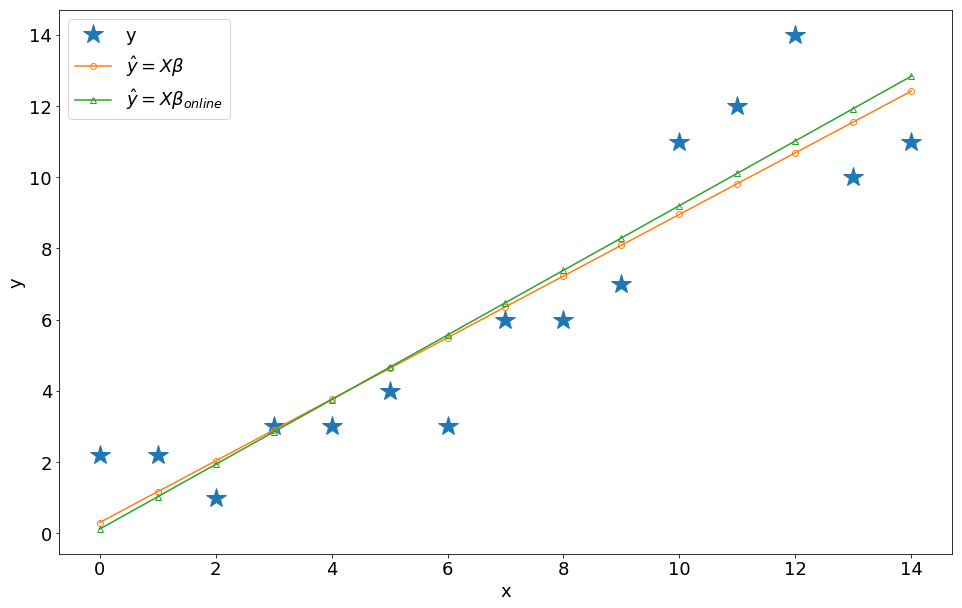

In [56]:
plt.plot(x,y,'*',ms=20)
plt.plot(x,yfit,'o-',mfc='none')
plt.plot(x,yfit2,'^-',mfc='none')

plt.legend(['y','$\hat{y} = X\\beta$','$\hat{y} = X\\beta_{online}$'])
plt.xlabel('x')
plt.ylabel('y')

# <font color = 'red'> PROBLEM1: </font> (<font color ='green'> SOLVED </font> )

the magnitude of each column in matrix $\pmb{XV}$ <font color ='red'> SHOULD </font> equal a corresponding diagonal element in 

# <font color = 'red'> PROBLEM2: </font> (<font color='green'> SOLVED </font> )
    
Matrices $\pmb{U}$, $\pmb{\Sigma}$ $\pmb{V}$ that you compute 
look nothing like those returned by np.linalg.svd()

## ----------------------------------------------------------

## More on SVD

ref: https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254